# ASSIGNMENT 1: signals, sampling and quantization
Signals are presented in Python as discrete sequences in array format which makes the program suitable for generating and processing digital signals.
## Generating signals
Dirac’s delta function describes an impulse that is defined as

$\delta\left(t-t_{0}\right)=\left\{\begin{array}{ll}{1} & {t=t_{0}} \\ {0} & {t \neq t_{0}}\end{array}\right. \quad \text{(1-1)}$

where $t$ is a continuous time variable and $t_0$ is the delay of the impulse. The continuous-time impulse function cannot be established because it contains infinite frequencies. In discrete cases the impulse function is possible to be formed and it is defined as

$\delta\left(n-n_{0}\right)=\left\{\begin{array}{ll}{1} & {n=n_{0}} \\ {0} & {n \neq n_{0}}\end{array}\right. \quad \text{(1-2)}$

where $n$ is discrete time for sampling and $n_0$ is delay of the impulse.

An analogue sine wave is defined as

$x(t)=A \sin \left(\omega_{0} t+\Phi\right)=A \sin \left(2 \pi f_{0} t+\Phi\right) \quad \text{(1-3)}$

where $A$, $\omega_0$, $\phi$ and $f_0$ are the signal’s amplitude, angle frequency, phase and frequency (Hz), respectively. When samples are taken at the moments $t = nT$, a discrete signal is defined as (normalization $T = 1$)

$x(n)=A \sin \left(2 \pi f_{0} t+\Phi\right) \quad \text{(1-4)}$

Start by running the code block below to load the Python packages required to complete this assignment. To run the code, select the code block and push Ctrl+Enter or click the Run button.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1.1** Generate an impulse function with delay with the command
```python
d = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
```
Plot your impulse with the command
```python
plt.stem(d)
```

Text(0, 0.5, 'Amplitude')

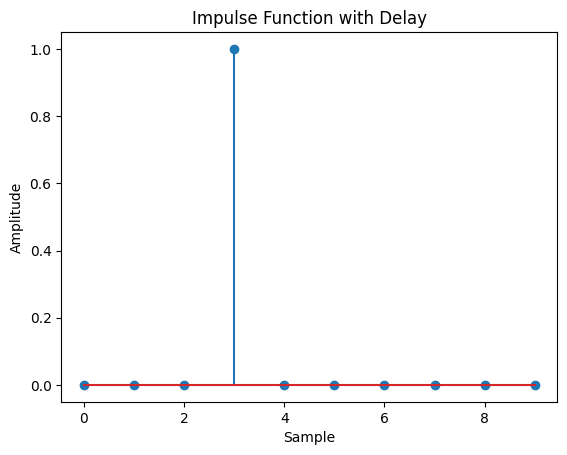

In [2]:
d = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
plt.stem(d)
plt.title('Impulse Function with Delay')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

Writing the signal to an array by hand is slow. A better way to define signals is to make functions that generate them. Python's NumPy library has some built-in functions that can be used, *sin* and *cos*. You can also use a text editor or the code cells in Jupyter notebook to write your own functions that use these built-in resources. Functions accept input arguments, and they can return
output values. The function *sin_gen1* for creating a basic ‘analogue look’ sine wave s is presented next. The function *sin_gen1* creates a signal s with amplitude A, normalized frequency $f_n$ ($f_n=f_0/f_s$ and is in range [0, 1]), length in samples <b>L</b> and phase **fii**. The function returns s and <b>A</b>, <b>fn</b>, <b>L</b> and <b>fii</b> are given as input parameters. The function also plots the signal. The function code is the following:

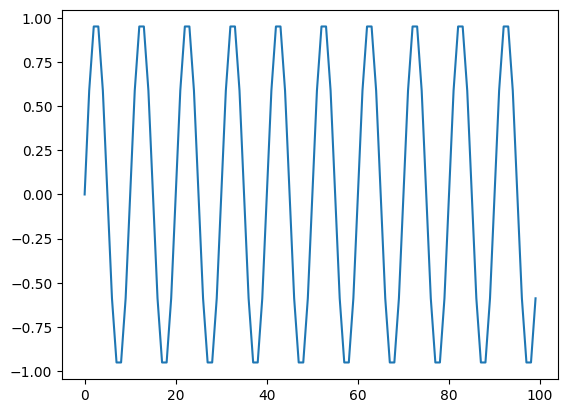

In [3]:
def sin_gen1(A, fn, L, fii):
    """
    Generate and plot a sinusoidal signal.
    
    Parameters:
    A :   amplitude
    fn :  normalized signal frequency (sampling freq. fs = 1)
    L :   length of signal in samples
    fii : phase angle
    
    Returns:
    s sine signal values
    """
    n = np.arange(0, L)  # an array containing values 0…L-1
    s = A * np.sin(2*np.pi*fn*n + fii)  # calculates the sine values
    plt.plot(n, s) # creates a plot
    return s

# example... seeing how it works 
A = 1.0
fn = 0.1
L = 100
fii = 0

s = sin_gen1(A, fn, L, fii)

In Python you can add comment lines by starting the line with a `#`. 

The first lines of a function in Python should contain a documentation string (a.k.a. docstring) surrounded by triple double quotes. The docstring explains the purpose of the function as well as how to use it.

Once the function sin_gen1 has been defined, the function can be used with the command

```python
s = sin_gen1(A, fn, L, fii)
```

After this s can be used in the workspace.

Test the function described above using different input parameters <b>A</b>, <b>fn</b>, <b>L</b> and <b>fii</b>:

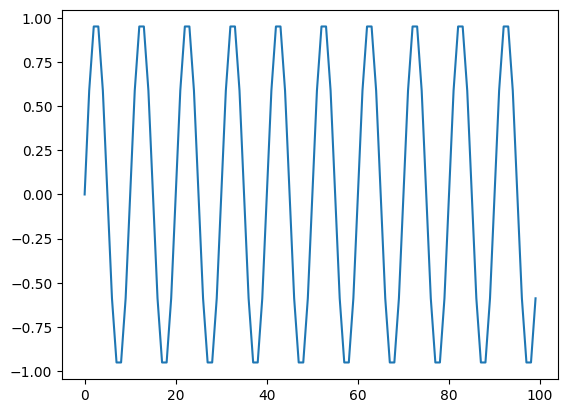

In [4]:
A = 1.0   #Amplitude
fn = 0.1  #Normalized signal frequency
L = 100   #Length of signals in samples
fii = 0   #Phase angle

s = sin_gen1(A, fn, L, fii)


**Task 1.2.** Create a second function that generates a discrete-time sine wave, similar to equation (1-4). Amplitude <b>A</b>, signal frequency <b>f0</b>, sampling frequency <b>fs</b>, signal length in seconds <b>t</b> and phase <b>fii</b> should be inputs to the function. Write your code in the function sin_gen2 below. You must generate an array `n` that contains the sampling instants (times of samples). The samples are separated by the time Ts=1/fs. `n = np.arange(0, t+Ts, Ts)` creates an array that contains the values 0…t with increments of Ts. The function should also include an option to plot the generated signal. When the parameter `plot` is set to `True`, the function should plot the generated signal using stem and place the right values to the time-axis in seconds and label the axis. This can be done with the following code:
```python
if plot:
    fig, ax = plt.subplots()
    ax.stem(n, s)
    ax.set_xlabel('time (s)')
```

In [5]:
def sin_gen2(A, f0, fs, t, fii, plot=False):
    """
    Generate and plot a discrete-time sine wave.
    
    Parameters:
    A :   amplitude
    f0 :  signal frequency in Hertz
    fs :  sampling frequency in Hertz
    t :   signal length in seconds
    fii : phase angle
    plot : whether the signal should be plotted
    
    Returns:
    s sinusoidal signal vector
    """
    # implement the function as described above
    Ts = 1 / fs  #Sampling interval
    n = np.arange(0, t+Ts, Ts) #Array of sampling
    s = A * np.sin(2* np.pi * f0 * n + fii)  # calculates the sine values

    if plot:
        fig, ax = plt.subplots()
        ax.stem(n, s)  #plots the signal with stem
        ax.set_xlabel('time (s)')  #label for x-axis
        ax.set_title('Discrete-Time Sine Wave')

    return s
    

Test that your function works by using the values: A = 1, f0 = 800 Hz, fs = 8 kHz, t = 5ms and fii = π/2. Set the parameter `plot` to `True` in the function call to plot the signal.

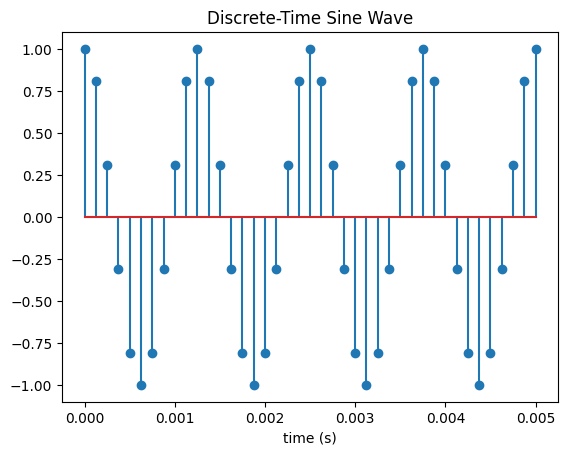

In [6]:
# Example
A = 1.0       #Amplitude
f0 = 800      #Signal frequency in Hertz
fs = 8000     #Sampling frequency in Hertz (8KHz)
t = 0.005     #Signal length in seconds (5 ms)
fii = np.pi/2 #Phase angle
plot = True

s = sin_gen2(A, f0, fs, t, fii, plot)

## Sampling and aliasing
Let an analogue signal have its biggest frequency component $f_{max}$. According to Nyquist sampling theorem, the signal has to be sampled at least at the frequency $2 f_{max}$ in order to reconstruct the signal completely. If the sampling frequency is below $2 f_{max}$, the aliasing effect will occur and distort the signal and its spectrum, which means that some data is permanently lost. An analogue signal is usually filtered with an anti-aliasing filter before sampling.

**Task 1.3** Listen to the audio samples from Moodle which are sampled with frequencies 44100 (MyInsaneFriend44100.wav), 22050 (MyInsaneFriend22050.wav), 11025 (MyInsaneFriend11025.wav) and 5512 (MyInsaneFriend5512.wav) Hz (music from www.ee.oulu.fi/~sunday/Amplifear).

**What happens to the low and high frequencies and the music quality when the sampling frequency is lowered?**

`* Type your answer here *`
When the sampling frequency is lowered, several effects on the low and high frequencies, as well as music quality is observed as follows:
1. Lower Frequencies:
    As sampling frequency decreases, the representation of low frequencies remains relatively accurate (due to relative long wavelength), but the overall dynamic range and fidelity(accuracy and quality) of the audio may decrease.

2. Higher frequencies:
    They are the most affected by lower sampling rates due to Nyquist theorem, as aliasing occurs. Aliasing causes high-frequency components to be reflected back into the lower frequency range, which distorts the original signal.
    As sampling frequency decreases (is lowered), more high frequency content is lost and more aliasing components are introduced.

3. Music Quality:
    As sampling frequency is lowered, the quality of the music degrades, with high frequencies being lost and aliasing components becoming more prominent. It results in a duller, more distorted sound with a significant loss of clarity and detail.

    At 5512 Hz, most high frequency content is lost due to aliasing. The sound is muffled with alot of distortion. The overall quality is much poorer, making it difficult to notice finer details in the music.

    At 44100 Hz, the audio is of high quality, preserving both low and high frequencies accurately.

    At 22050 Hz, the audio starts to sound duller, with less clarity in the high-frequency range. Since some of the higher frequency content (above 11025 Hz) may be lost.

    At 11025 Hz, the audio starts to sound even more duller and more distorted. Since the significant high-frequency content may be lost, and aliasing components become more noticeable.

## Quantization
In the A/D-conversion of a signal, both time discretization and amplitude discretization are done. The accuracy of the result depends on the system specifications. Let’s study a system with 4-bit accuracy. If the signal input to this system is a sine wave with an amplitude of one, then peak-to-peak amplitude $V_{fs} = 2$. In a 4-bit system there will be $2^B = 2^4 = 16$ different quantization levels, and $2^B–1 = 15$ steps between levels. This causes the quantization step length to be $V_{fs}$/number of steps = 2/15 = 0.1333.

**Task 1.4.** Use the function sin_gen1 with parameters A=1, fn =0.01, L=100, and fii=0 to create a sine wave s. Quantize the sine wave to a 2-bit representation using
```python
s2 = uencode(s, 2)
```
Plot the resulting and original sine wave to the same sheet using, for example, the function *subplots* or *subplot*.

In [7]:
def uencode(s, b):
    """Represent the values in s using b bits by employing rounding quantization."""
    return (((s-s.min()) / (s.max()-s.min())) * (2**b - 1)).round().astype('uint')

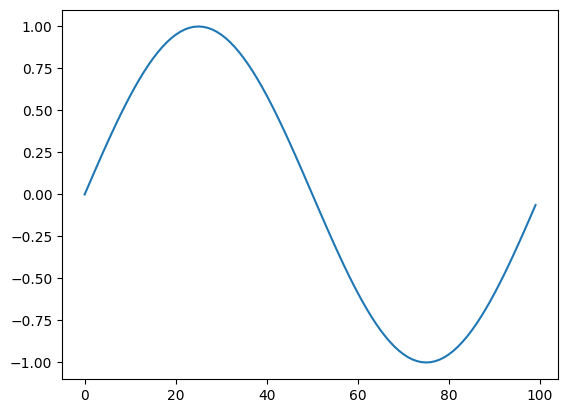

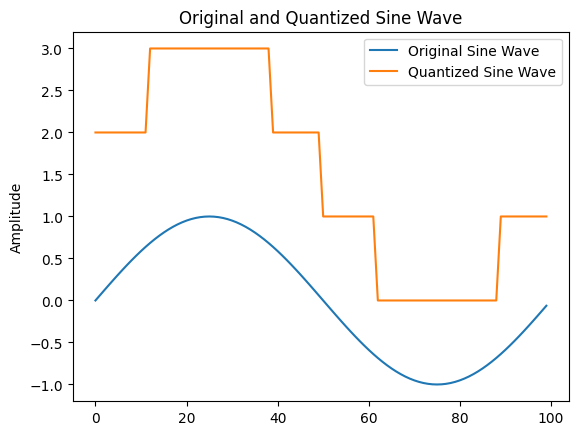

In [8]:
# generate the signal s by using sin_gen1
A = 1
fn = 0.01
L = 100
fii = 0
s = sin_gen1(A, fn, L, fii)

# create s2 by quantizing s
s2 = uencode(s, 2)

# plot s and s2
fig, ax = plt.subplots()
ax.plot(s, label = 'Original Sine Wave')
ax.plot(s2, label = 'Quantized Sine Wave')
ax.set_ylabel('Amplitude')
ax.set_title('Original and Quantized Sine Wave')
ax.legend()   #adds the labels, includes all labeled lines

### Instructions for submission
1. Make sure that your code produces the desired results from scratch by selecting Kernel -> Restart & Run all. This will clear the output of your code and run all the code cells again from top to bottom. Also make sure that you have answered all the questions highlighted in **bold**.

2. Rename this notebook to `DF_Assignment1_firstname_lastname_studentnumber.ipynb` (e.g. DF_Assignment1_John_Smith_1234567.ipynb).

3. Submit only the resulting notebook (.ipynb file) to the return box in Moodle. Send your submission before the deadline to receive additional week exam points. Late submissions must be returned to a separate return box.